In [1]:
import torch
from usta_model import UstaModel
from usta_tokenizer import UstaTokenizer

u_tokenizer = UstaTokenizer("tokenizer.json")

prompt = "the capital of united"

tokens = u_tokenizer.encode(prompt)
tokens

tensor([ 0, 61,  1, 61,  2, 61,  3])

In [2]:
torch.manual_seed(1)
u_model = UstaModel(vocab_size=len(u_tokenizer.vocab), embedding_dim=4, num_heads=2, context_length=32)

sentence_meanings_with_atention_context = u_model(tokens)
sentence_meanings_with_atention_context.shape

torch.Size([7, 4])

In [3]:
out = u_model(tokens)
out

tensor([[ 0.2463, -0.4891, -1.2332,  1.4761],
        [ 0.0318, -0.6780, -0.9673,  1.6134],
        [-0.4828,  0.1527, -1.1929,  1.5230],
        [-0.1944, -0.8273, -0.6629,  1.6845],
        [-0.0228, -0.9641, -0.6428,  1.6297],
        [-0.2027, -0.7301, -0.7563,  1.6891],
        [-0.0490, -0.9146, -0.6792,  1.6428]], grad_fn=<MulBackward0>)

In [4]:
from usta_layer_norm import UstaLayerNorm

norm_layer = UstaLayerNorm(4)
norm_layer(out)

tensor([[ 0.2463, -0.4892, -1.2333,  1.4762],
        [ 0.0318, -0.6780, -0.9674,  1.6135],
        [-0.4829,  0.1527, -1.1931,  1.5232],
        [-0.1944, -0.8273, -0.6629,  1.6847],
        [-0.0228, -0.9642, -0.6429,  1.6299],
        [-0.2027, -0.7301, -0.7564,  1.6893],
        [-0.0490, -0.9147, -0.6793,  1.6430]], grad_fn=<MulBackward0>)

In [5]:
u_model

UstaModel(
  (embedding): Embedding(64, 4)
  (pos_embedding): Embedding(64, 4)
  (self_attation): UstaMultiHeadAttention(
    (multi_head_attention): MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinear(in_features=4, out_features=4, bias=True)
    )
    (projection): Linear(in_features=4, out_features=4, bias=True)
  )
  (norm): UstaLayerNorm()
)

In [6]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

q_tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen3-0.6B")
q_model = AutoModelForCausalLM.from_pretrained("Qwen/Qwen3-0.6B")

c:\Users\Artun\anaconda3\envs\LLM\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


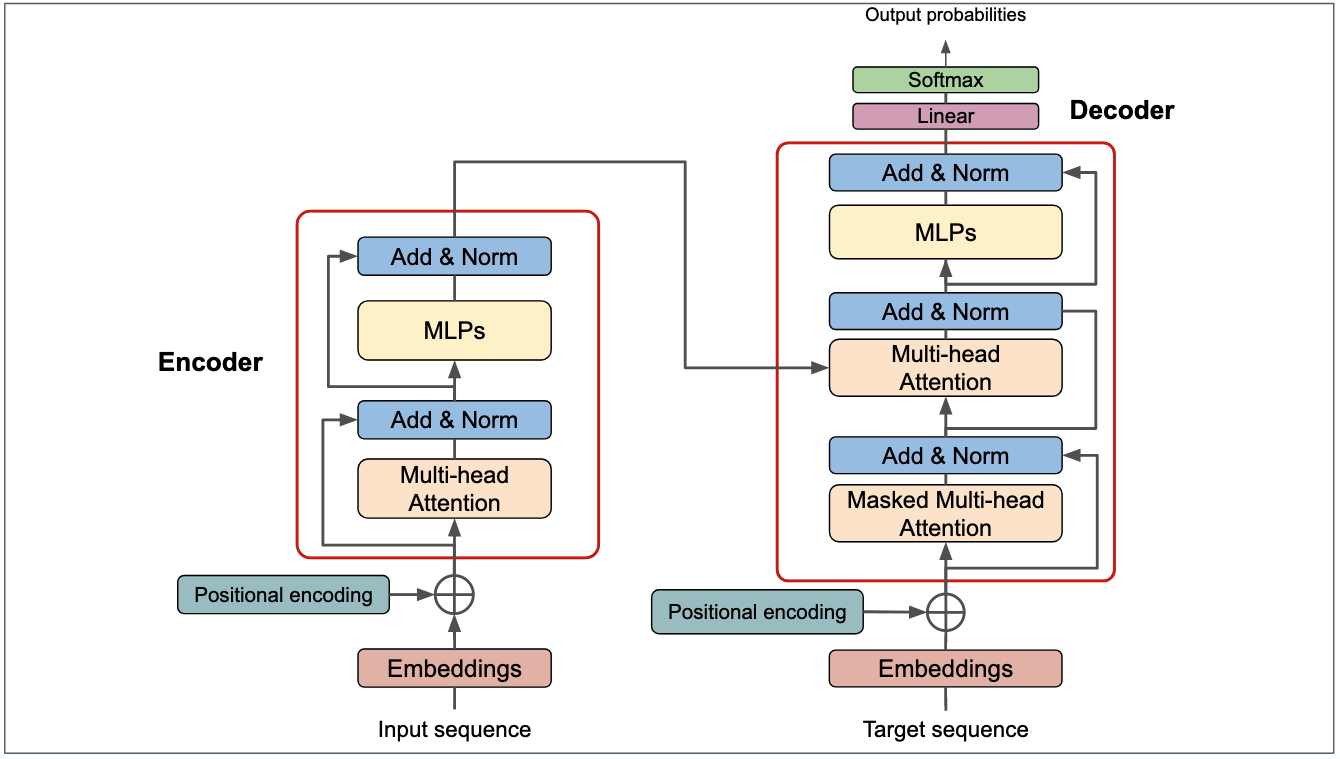

In [7]:
q_model

Qwen3ForCausalLM(
  (model): Qwen3Model(
    (embed_tokens): Embedding(151936, 1024)
    (layers): ModuleList(
      (0-27): 28 x Qwen3DecoderLayer(
        (self_attn): Qwen3Attention(
          (q_proj): Linear(in_features=1024, out_features=2048, bias=False)
          (k_proj): Linear(in_features=1024, out_features=1024, bias=False)
          (v_proj): Linear(in_features=1024, out_features=1024, bias=False)
          (o_proj): Linear(in_features=2048, out_features=1024, bias=False)
          (q_norm): Qwen3RMSNorm((128,), eps=1e-06)
          (k_norm): Qwen3RMSNorm((128,), eps=1e-06)
        )
        (mlp): Qwen3MLP(
          (gate_proj): Linear(in_features=1024, out_features=3072, bias=False)
          (up_proj): Linear(in_features=1024, out_features=3072, bias=False)
          (down_proj): Linear(in_features=3072, out_features=1024, bias=False)
          (act_fn): SiLUActivation()
        )
        (input_layernorm): Qwen3RMSNorm((1024,), eps=1e-06)
        (post_attention_layer